#                                               AIRCRAFT RISK ANALYSIS

## OBJECTIVE:
Analysing the risk associated with each aircraft and giving adequate recommendations to my client. 
This analysis will be done by considering different factora that could either lead to an increase or a decrease in the level of risk. 
Such include: 
* Weather conditions 
* The make and model of the aircraft 
* Purpose of flight 
* Broadphase of flight and many more factors that are desribed in this workbook

## DATA CLEANING AND ANALYSIS 
# 1.0 Importing the necessary libraries 

Pandas library will provide data structures that will help us work with the large CSV file while numpy will assist us in performing numerical analysis of the data. 

In [1]:
#import pandas library
import pandas as pd

#import numpy library
import numpy as np

# 2.0 Loading and reading the CSV files

In [2]:
#Assign your dataset to the variable df
#We will use "encoding=ISO-8859-1" so that we can be able to read non UTF-8 characters
df=pd.read_csv("AviationData.csv", encoding="ISO-8859-1")
abbr=pd.read_csv("USState_Codes.csv")


C:\Users\USER\AppData\Local\Temp\ipykernel_11056\2610653574.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("AviationData.csv", encoding="ISO-8859-1")


# 3.0 Understanding our data

This will invlove: 
* Having a preview of the first and the last 5 rows to get a gist of what the dataset entails.
* Checking the column names in the dataset.
* Determining the shape of the dataset. We will use it as a comparison while doing our cleaning.
* Finding some statistical measures (ie. mean,min,max etc.) for the relevant columns

In [3]:
#A preview of the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
abbr.head(10)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [5]:
#A preview of the last 5 rows 
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
abbr.tail(10)

,US_State,Abbreviation
52,Marshall Islands,MH
53,Micronesia,FM
54,Northern Marianas,MP
55,Palau,PW
56,Puerto Rico,PR
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


In [7]:
#Checking the column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
abbr.columns

Index(['US_State', 'Abbreviation'], dtype='object')

In [9]:
#Checking the shape of the dataset
rows=df.shape[0]
columns=df.shape[1]
print(f"The aviation data set has {rows} rows and {columns} columns")

The aviation data set has 88889 rows and 31 columns


In [10]:
#Checking the shape of the abbreviation dataset
rows=abbr.shape[0]
columns=abbr.shape[1]
print(f"The abbreviation data set has {rows} rows and {columns} columns")

The abbreviation data set has 62 rows and 2 columns


In [11]:
#Finding descriptive  statistics for the relevant columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [12]:
abbr.describe()

,US_State,Abbreviation
count,62,62
unique,62,62
top,Alabama,AL
freq,1,1


# 4.0 Data cleaning

We are going to check for and address:
* Unnecessary columns
* Duplicated rows
* Null values
* Outliers
* Syntax errors
 


### 4.0.1 Dropping unnecessary columns
These are columns whose data will not aid in analyzing the level of risk in different aircrafts.

These columns include:
["Air.carrier","Accident.Number","Airport.Code","Schedule","Investigation.Type","Latitude","Longitude","Registration.Number","Amateur.Built","FAR.Description","Report.Status","Publication.Date"]
* The ["Air.carrier"] column contains airline company names that provides services using airplanes. This information will not be used in our analysis as other airline company names cannot be used to test for riskiness in aircrafts.
* The ["Accident.Number"] column contains unique alphanumeric values to represent each accident/incident that occured. I chose to use the Event.Id column as a unique key column to the dataset instead of ["Accident.Number"].
* The ["Airport.Code"] column contains unique codes that represent each airport. I chose to use the ["Airport.Name"] column to easily identify and refer to airport names.
* The ["Schedule"] column contains information whether a flight was scheduled, not scheduled or unknown. I do not believe that this data can be used to influence the level of risk in aircrafts.
* The ["Investigation.Type"] column explains whether it was an accident or an incident. I will howerver use the ["Injury.Severty"] column to explain this since it explains these accidents or incidents in a deeper level.
* I will drop the ["Latitude"] and ["Longitude"] column and instead use the ["Location"] and ["Country"] column in mapping. This also due to the fact that the ["Latitude"] and ["Longitude"] have more null values.
* The ["Registration.Number"] column contains registration numbers for different aircrafts. I will however use the ["Make"] and ["Model"] company to easily refer to different aircrafts.
* The ["Amateur.Built"] column shows whether the aircraft was made by an amateur or not and I will not use this in analyzing the level of risks in different aircrafts.
* The ["FAR.Description"] column contains data of different Federal Aviation Regulations that govern each aircraft. This will not be used in our analysis.
* The ["Report.Status"] and ["Publication.Date"] columns are unnecessary in analyzing whether certain aircrafts are more risky than others.
* Instead of using the ["Injury.Severity"] column i will use the Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries and Total.Uninjured

In [13]:
#Drop all the unnecsessary columns in our analysis
#Use (inplace=True) to ensure that all the changs we make are maintained.

df.drop(columns=["Air.carrier","Accident.Number","Airport.Code","Schedule","Investigation.Type","Latitude","Longitude","Registration.Number","Amateur.Built","FAR.Description","Report.Status","Publication.Date","Injury.Severity"],inplace=True)

In [14]:
#Checking whether the unnecessary columns have been dropped
df
#We can observe that we have dropped 12 unnecessary columns

,Event.Id,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",United States,NaN,Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,NaN,Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",United States,NaN,Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,2022-12-26,"Payson, AZ",United States,PAYSON,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


### 4.0.2 Null values
Our intention is check for and fill these null values to ensure smooth analysis of our data.

In [15]:
#Checking for presence of null values
df.isnull().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Country                     226
Airport.Name              36185
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [16]:
#checking whether the abbreviation set has null values
abbr.isnull().sum()

US_State        0
Abbreviation    0
dtype: int64

We are going to fill the null values of the columns "Country", "Make", "Model", "Aircraft.damage", "Engine.type","Purpose.of.flight", "Weather.condition", "Number.of.Engines"
 with their respective modes. This is because the ratio between empty rows per column to the total number of rows is very small.

In [17]:
#fill null values of the columns with the mode
country_mode=df["Country"].mode()[0]
df["Country"].fillna(country_mode,inplace=True)

make_mode=df["Make"].mode()[0]
df["Make"].fillna(make_mode,inplace=True)

model_mode=df["Model"].mode()[0]
df["Model"].fillna(model_mode,inplace=True)

craftdamage_mode=df["Aircraft.damage"].mode()[0]
df["Aircraft.damage"].fillna(craftdamage_mode,inplace=True)

engineType_mode=df["Engine.Type"].mode()[0]
df["Engine.Type"].fillna(engineType_mode,inplace=True)

purposeFlight_mode=df["Purpose.of.flight"].mode()[0]
df["Purpose.of.flight"].fillna(purposeFlight_mode,inplace=True)

weather_mode=df["Weather.Condition"].mode()[0]
df["Weather.Condition"].fillna(weather_mode,inplace=True)

engineNum_mode=df["Number.of.Engines"].mode()[0]
df["Number.of.Engines"].fillna(engineNum_mode,inplace=True)



We are going to fill the null values of the columns "Location", "Airport.Name", "Aircraft.Category", "Broad.phase.of.flight" with Unknown. This is because the values contained in each one of these columns is very unique and cannot be guessed or has too many null values

In [18]:
#Fill the null values of the columns with Unknown
df["Location"].fillna("Unknown",inplace=True) 

df["Airport.Name"].fillna("Unknown",inplace=True)

df["Aircraft.Category"].fillna("Unknown",inplace=True)

df["Broad.phase.of.flight"].fillna("Unknown",inplace=True)

Checking for skewness in our numerical data.
* This will help us to determine whether we fill the null values of those columns with mean or median.
* If it is skewed we will fill the null values with median but when it is not skewed(normally distributed) we will fill the null values with the mean 

In [19]:
#Checking for skewness in our numerical data
skewness_1=df["Total.Serious.Injuries"].skew()
print(f"Total.Serious.Injuries Column has a skewness of {skewness_1}. This means it has extreme outliers")

skewness_2=df["Total.Minor.Injuries"].skew()
print(f"Total.Minor.Injuries Column has a skewness of {skewness_2}. This means it has extreme outliers")

skewness_3=df["Total.Uninjured"].skew()
print(f"Total.Uninjured Column has a skewness of {skewness_3}. This means it has extreme outliers")

skewness_4=df["Total.Fatal.Injuries"].skew()
print(f"Total.Fatal.Injuries Column has a skewness of {skewness_4}. This means it has extreme outliers")


Total.Serious.Injuries Column has a skewness of 49.40002484924553. This means it has extreme outliers
Total.Minor.Injuries Column has a skewness of 87.26947645182727. This means it has extreme outliers
Total.Uninjured Column has a skewness of 9.086104094841762. This means it has extreme outliers
Total.Fatal.Injuries Column has a skewness of 33.01867532377133. This means it has extreme outliers


#### Since the 4 columns named above are positively skewed, we will use median to fill the null values

In [20]:
#fill null values of the column "Total.Fatal.Injuries" with median
fatal_median=df["Total.Fatal.Injuries"].median()
df["Total.Fatal.Injuries"].fillna(fatal_median,inplace=True)

In [21]:
#fill null values of the column "Total.Serious.Injuries" with median
serious_median=df["Total.Serious.Injuries"].median()
df["Total.Serious.Injuries"].fillna(serious_median,inplace=True)

In [22]:
#fill null values of the column "Total.Minor.Injuries" with median
minor_median=df["Total.Minor.Injuries"].median()
df["Total.Minor.Injuries"].fillna(minor_median,inplace=True)

In [23]:
#fill null values of the column "Total.Uninjured" with median
uninjured_median=df["Total.Uninjured"].median()
df["Total.Uninjured"].fillna(uninjured_median,inplace=True)

In [24]:
df.isnull().sum()

Event.Id                  0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

### 4.0.3 Taking care of syntax errors

 Changing the data in the columns to uppercase


In [25]:
# changing the categorical data into uppercase
for column in ["Make", "Location", "Country","Airport.Name","Aircraft.damage","Aircraft.Category","Engine.Type","Purpose.of.flight","Broad.phase.of.flight",]:
    df[column] = df[column].str.upper()

In [26]:
df

,Event.Id,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,STINSON,108-3,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,PIPER,PA24-180,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN
2,20061025X01555,1974-08-30,"SALTVILLE, VA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,CESSNA,172M,1.0,RECIPROCATING,PERSONAL,3.0,0.0,0.0,1.0,IMC,CRUISE
3,20001218X45448,1977-06-19,"EUREKA, CA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,ROCKWELL,112,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE
4,20041105X01764,1979-08-02,"CANTON, OH",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,CESSNA,501,1.0,RECIPROCATING,PERSONAL,1.0,2.0,0.0,0.0,VMC,APPROACH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,UNKNOWN,SUBSTANTIAL,UNKNOWN,PIPER,PA-28-151,1.0,RECIPROCATING,PERSONAL,0.0,1.0,0.0,0.0,VMC,UNKNOWN
88885,20221227106494,2022-12-26,"HAMPTON, NH",UNITED STATES,UNKNOWN,SUBSTANTIAL,UNKNOWN,BELLANCA,7ECA,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,0.0,VMC,UNKNOWN
88886,20221227106497,2022-12-26,"PAYSON, AZ",UNITED STATES,PAYSON,SUBSTANTIAL,AIRPLANE,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN
88887,20221227106498,2022-12-26,"MORGAN, UT",UNITED STATES,UNKNOWN,SUBSTANTIAL,UNKNOWN,CESSNA,210N,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,0.0,VMC,UNKNOWN


In [27]:
#we also need to change the abbreviation dataset into uppercase so that we can be able to merge it smoothly onto the aviation dataset
for column in ["US_State"]:
    abbr[column] = abbr[column].str.upper()

In [28]:
#checking whether the data in the abbr variable has been changed to uppercase
abbr.head(10)

,US_State,Abbreviation
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA
5,COLORADO,CO
6,CONNECTICUT,CT
7,DELAWARE,DE
8,FLORIDA,FL
9,GEORGIA,GA


Taking care of case sensitive issues in the "make" column

In [29]:
#making sure that words are spelt correctly
df["Make"].replace("CESNA","CESSNA",inplace=True)

Splitting the location column into two, i.e "cities" and "abbreviation". This will aid in mapping in Tableau

In [30]:
#splitting the location column so that it will help us while mapping
df[["City","Abbreviation"]]=df["Location"].str.split(",",n=1,expand=True)

In [31]:
df.head()

,Event.Id,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,City,Abbreviation
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,STINSON,108-3,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,MOOSE CREEK,ID
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,PIPER,PA24-180,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,BRIDGEPORT,CA
2,20061025X01555,1974-08-30,"SALTVILLE, VA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,CESSNA,172M,1.0,RECIPROCATING,PERSONAL,3.0,0.0,0.0,1.0,IMC,CRUISE,SALTVILLE,VA
3,20001218X45448,1977-06-19,"EUREKA, CA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,ROCKWELL,112,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,EUREKA,CA
4,20041105X01764,1979-08-02,"CANTON, OH",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,CESSNA,501,1.0,RECIPROCATING,PERSONAL,1.0,2.0,0.0,0.0,VMC,APPROACH,CANTON,OH


Stripping white spaces in all our column elements

In [32]:
df_columns=df.columns.str.strip()

### 4.0.4 Dropping duplicated rows

In [33]:
#check for presence of duplicated rows
df.duplicated().sum()

29

In [34]:
#Dropping duplicated rows
df.drop_duplicates()

,Event.Id,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,City,Abbreviation
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,STINSON,108-3,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,MOOSE CREEK,ID
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,PIPER,PA24-180,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,BRIDGEPORT,CA
2,20061025X01555,1974-08-30,"SALTVILLE, VA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,CESSNA,172M,1.0,RECIPROCATING,PERSONAL,3.0,0.0,0.0,1.0,IMC,CRUISE,SALTVILLE,VA
3,20001218X45448,1977-06-19,"EUREKA, CA",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,ROCKWELL,112,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,EUREKA,CA
4,20041105X01764,1979-08-02,"CANTON, OH",UNITED STATES,UNKNOWN,DESTROYED,UNKNOWN,CESSNA,501,1.0,RECIPROCATING,PERSONAL,1.0,2.0,0.0,0.0,VMC,APPROACH,CANTON,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,UNKNOWN,SUBSTANTIAL,UNKNOWN,PIPER,PA-28-151,1.0,RECIPROCATING,PERSONAL,0.0,1.0,0.0,0.0,VMC,UNKNOWN,ANNAPOLIS,MD
88885,20221227106494,2022-12-26,"HAMPTON, NH",UNITED STATES,UNKNOWN,SUBSTANTIAL,UNKNOWN,BELLANCA,7ECA,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,0.0,VMC,UNKNOWN,HAMPTON,NH
88886,20221227106497,2022-12-26,"PAYSON, AZ",UNITED STATES,PAYSON,SUBSTANTIAL,AIRPLANE,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN,PAYSON,AZ
88887,20221227106498,2022-12-26,"MORGAN, UT",UNITED STATES,UNKNOWN,SUBSTANTIAL,UNKNOWN,CESSNA,210N,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,0.0,VMC,UNKNOWN,MORGAN,UT


This code above will confirm that we indeed dropped 29 duplicated rows

# 5.0 Saving our cleaned data

In [35]:
#saving our cleaned data as a csv
df.to_csv("Clean_Data.csv",index=False)

# 6.0 Exploratory Data Analysis

### This is trying to explain graphically how different variable columns are affected by one another. This analysis will focus on:
* Univariate analysis
* Bivariate analysis
* Multivariate analysis

In [36]:
#load and read the cleaned data and use it in our analysis as well as in data visualization
df1=pd.read_csv("Clean_Data.csv")

In [37]:
#Import the necessary library to aid in this analysis
import matplotlib.pyplot as plt
import seaborn as sns

### 6.0.1 Univariate analysis
* This kind of analysis gives a brief description of the distribution  of a single variable column

* Because we have over 80,000 rows we will have to randomly sample some rows that we will use in our analysis

This shows the distribution of total fatal injuries column

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


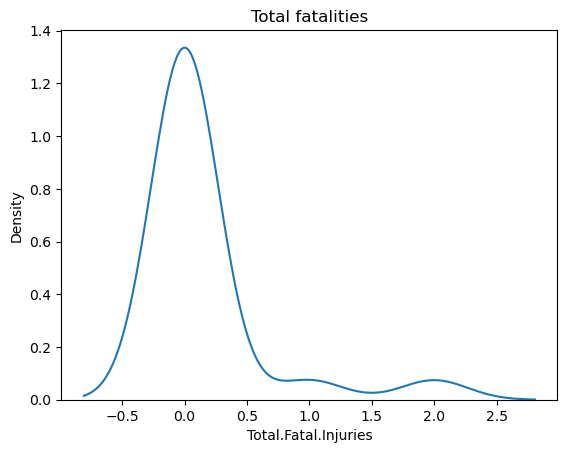

In [38]:
sns.kdeplot(df1["Total.Fatal.Injuries"].sample(20).reset_index(drop=True))
plt.title("Total fatalities")
plt.show()

This shows the distribution of total uninjured column

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


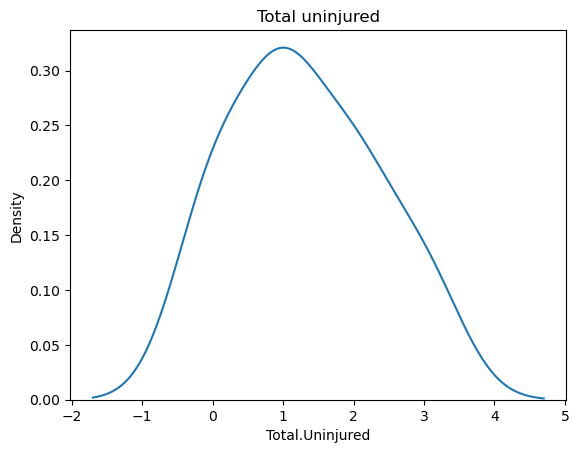

In [39]:
sns.kdeplot(df1["Total.Uninjured"].sample(20).reset_index(drop=True))
plt.title("Total uninjured")
plt.show()

This shows the distribution of total serious injuries column

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


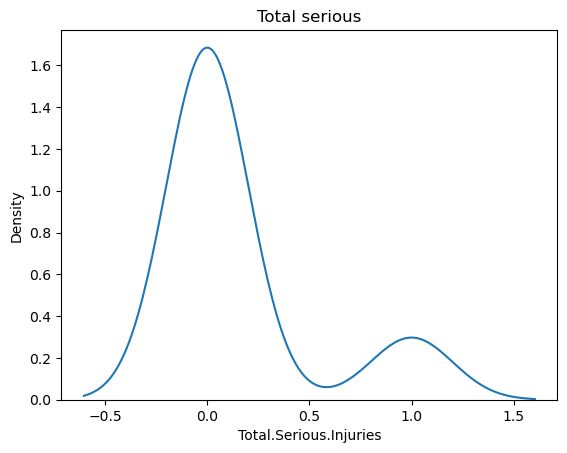

In [40]:
sns.kdeplot(df1["Total.Serious.Injuries"].sample(20).reset_index(drop=True))
plt.title("Total serious")
plt.show()

This shows the distribution of total minor injuries column

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


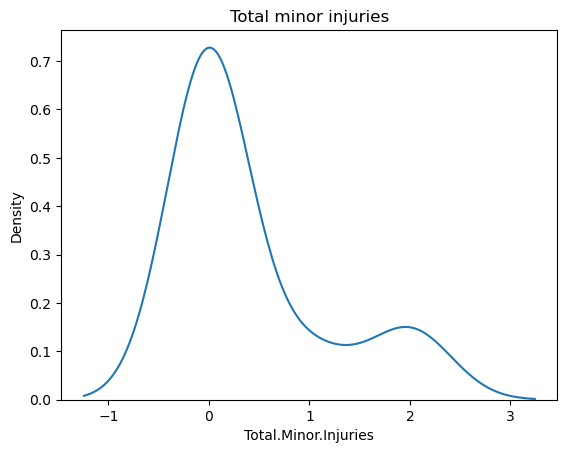

In [41]:
sns.kdeplot(df1["Total.Minor.Injuries"].sample(20).reset_index(drop=True))
plt.title("Total minor injuries")
plt.show()

### 6.0.2 Bivariate analysis
* This is an analysis between 2 column variables in the data set.

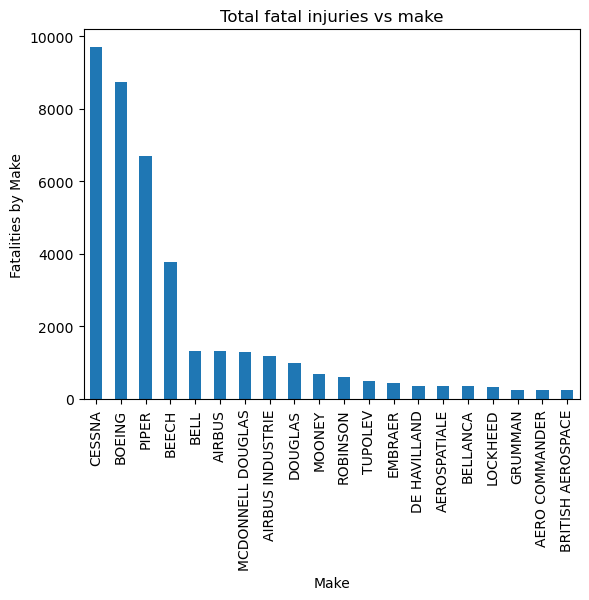

In [42]:
#analysing the relationship with the make column and the total.fatal.injuries column
make_fatalinjuries=df1.groupby("Make")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(20)

make_fatalinjuries.plot(kind="bar")
plt.title('Total fatal injuries vs make')
plt.ylabel("Fatalities by Make")
plt.show()

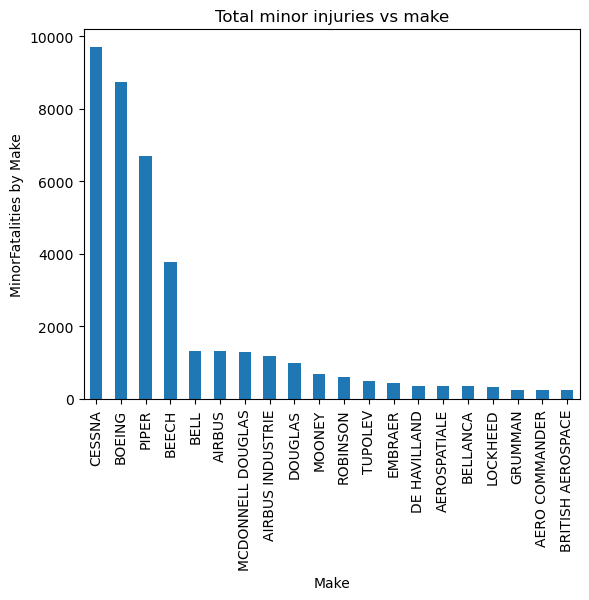

In [43]:
#analysing the relationship with the make column and the total.minor.injuries column
make_minorinjuries=df1.groupby("Make")["Total.Minor.Injuries"].sum().sort_values(ascending=False).head(20)

make_fatalinjuries.plot(kind="bar")
plt.title('Total minor injuries vs make')
plt.ylabel("MinorFatalities by Make")
plt.show()

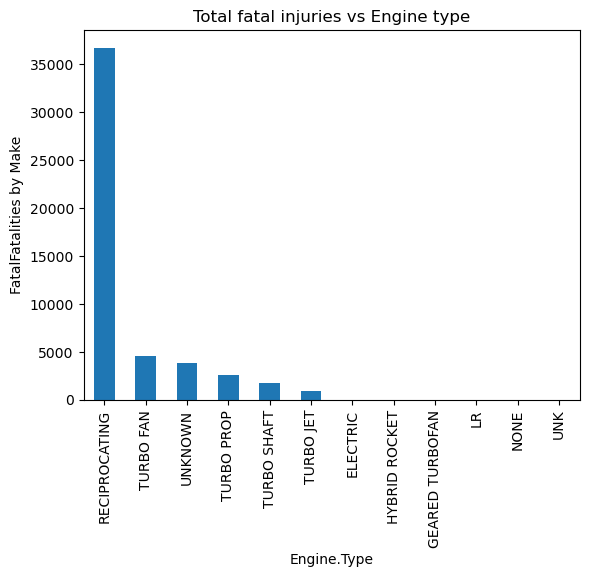

In [44]:
#analysing the relationship with the engine type.column and the total.fatal.injuries column
EngineType_fatalinjuries=df1.groupby("Engine.Type")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(20)

EngineType_fatalinjuries.plot(kind="bar")
plt.title('Total fatal injuries vs Engine type')
plt.ylabel("FatalFatalities by Make")
plt.show()

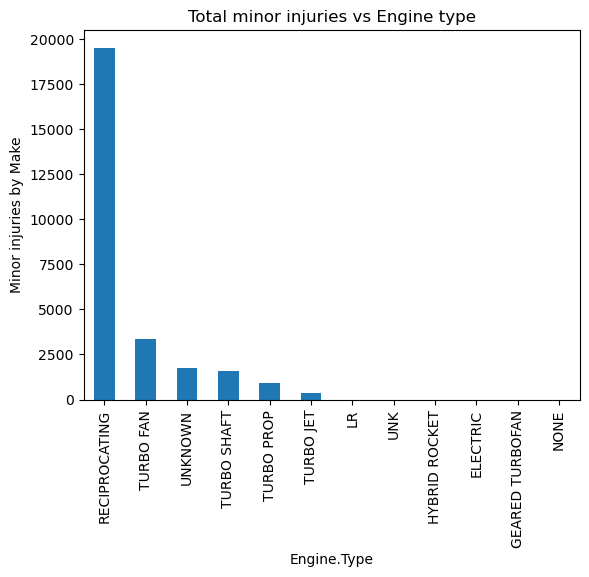

In [45]:
#analysing the relationship with the engine type.column and the total.minor.injuries column
EngineType_minorinjuries=df1.groupby("Engine.Type")["Total.Minor.Injuries"].sum().sort_values(ascending=False).head(20)

EngineType_minorinjuries.plot(kind="bar")
plt.title('Total minor injuries vs Engine type')
plt.ylabel("Minor injuries by Make")
plt.show()

<Axes: xlabel='Number.of.Engines', ylabel='Total.Fatal.Injuries'>

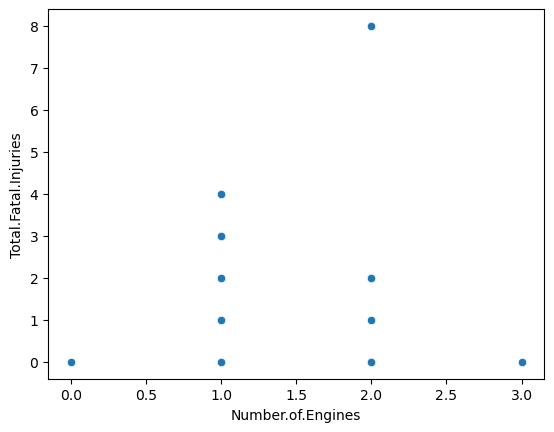

In [46]:
#analysing the relationship with the number of engines column and the total.fatal.injuries column
no_of_engines=df1["Number.of.Engines"].head(80)
no_fatalities=df1["Total.Fatal.Injuries"].head(80)
sns.scatterplot(x=no_of_engines, y=no_fatalities)


### 6.0.3 Multivariate analysis
* This is the analysis of more than 2 variable columns

<Axes: xlabel='Number.of.Engines', ylabel='Total.Fatal.Injuries'>

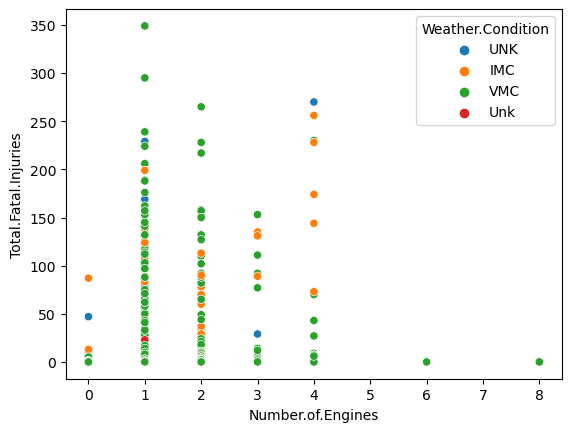

In [47]:
#analysing the relationship with the number of engines column and the total.fatal.injuries column
sns.scatterplot(x="Number.of.Engines", y="Total.Fatal.Injuries", hue="Weather.Condition", data=df1)

# Conclusion
* As observed above we notice that the distribution of total fatal, total minor, total serious injuries and total uninjured are skewed. This means that the distribution of data is not normally distributed.
* The aircrafts Cessna, Piper, Boeing have the highest Total fatal injuries respectively.
* Aircarfts with the following engine types have the highest total fatal injuries: Reciprocating, Turbofan and turbo prop engines have the highest total fatal injuries while also having the highest number of minor injuries both in descending order.
